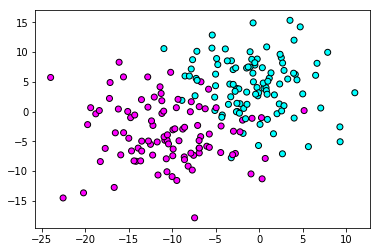

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y  = make_blobs(n_samples=200, random_state=1, centers=2, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.cool, edgecolors='k')
plt.show()

In [3]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=68)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predict_proba = gnb.predict_proba(X_test)

print('预测准确率形态:{}'.format(predict_proba.shape))

预测准确率形态:(50, 2)


In [4]:
print(predict_proba[:5])

[[0.98849996 0.01150004]
 [0.0495985  0.9504015 ]
 [0.01648034 0.98351966]
 [0.8168274  0.1831726 ]
 [0.00282471 0.99717529]]


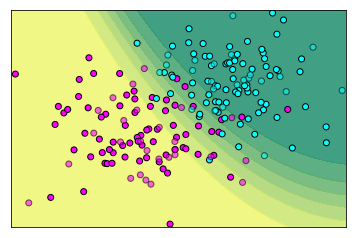

In [7]:
import numpy as np
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap = plt.cm.summer, alpha = .8)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.cool, edgecolors='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xticks(())
plt.yticks(())

plt.show()


In [8]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
dec_func = svc.decision_function(X_test)
print(dec_func[:5])

[ 0.02082432  0.87852242  1.01696254 -0.30356558  0.95924836]


D:\RJAZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


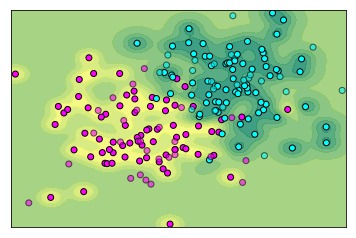

In [9]:

z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap = plt.cm.summer, alpha = .8)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.cool, edgecolors='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xticks(())
plt.yticks(())

plt.show()